In [1]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm


import pandas_datareader as pdr
import datetime 
AAPLE = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
GOOGLE = pdr.get_data_yahoo('GOOGL', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
McDonalds = pdr.get_data_yahoo('MCD', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))
GM = pdr.get_data_yahoo('GM', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))



In [5]:
GM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-01,23.410000,22.850000,23.000000,23.090000,7582100.0,17.879448
2012-10-02,24.100000,22.670000,23.500000,23.680000,21403400.0,18.336308
2012-10-03,24.610001,23.660000,23.709999,24.389999,14739000.0,18.886084
2012-10-04,24.670000,24.320000,24.549999,24.650000,8693500.0,19.087410
2012-10-05,25.430000,24.570000,24.879999,24.799999,14251000.0,19.203564
...,...,...,...,...,...,...
2020-01-24,34.990002,34.009998,34.900002,34.310001,9386600.0,34.310001
2020-01-27,33.759998,33.169998,33.630001,33.410000,10359100.0,33.410000
2020-01-28,33.860001,33.340000,33.570000,33.639999,8871000.0,33.639999


In [119]:
data=pd.concat([AAPLE[["Close"]],GOOGLE[["Close"]],McDonalds[["Close"]],GM[["Close"]]],axis=1)
data.columns=["APPLE","GOOGLE","McDonalds","GM"]

In [120]:
data.head

<bound method NDFrame.head of                  APPLE       GOOGLE   McDonalds         GM
Date                                                      
2012-10-01   94.198570   381.271271   91.989998  23.090000
2012-10-02   94.472855   378.873871   90.930000  23.680000
2012-10-03   95.921425   381.631622   90.349998  24.389999
2012-10-04   95.257141   384.409424   91.029999  24.650000
2012-10-05   93.227142   384.209198   91.000000  24.799999
...                ...          ...         ...        ...
2020-01-24  318.309998  1466.170044  211.240005  34.310001
2020-01-27  308.950012  1431.729980  209.339996  33.410000
2020-01-28  317.690002  1450.500000  210.389999  33.639999
2020-01-29  324.339996  1456.699951  214.440002  33.599998
2020-01-30  323.869995  1454.250000  216.179993  33.330002

[1844 rows x 4 columns]>

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


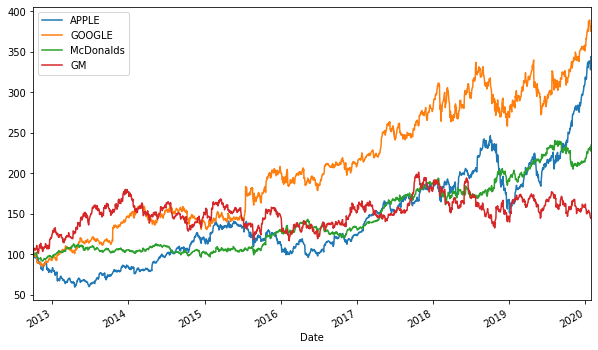

In [121]:
(data / data.ix[0] * 100).plot(figsize=(10, 6))

In [122]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,APPLE,GOOGLE,McDonalds,GM
Date,,,,
2012-10-01,NaN,NaN,NaN,NaN
2012-10-02,0.002908,-0.006308,-0.011590,0.025231
2012-10-03,0.015217,0.007252,-0.006399,0.029542
2012-10-04,-0.006949,0.007252,0.007498,0.010604
2012-10-05,-0.021541,-0.000521,-0.000330,0.006067


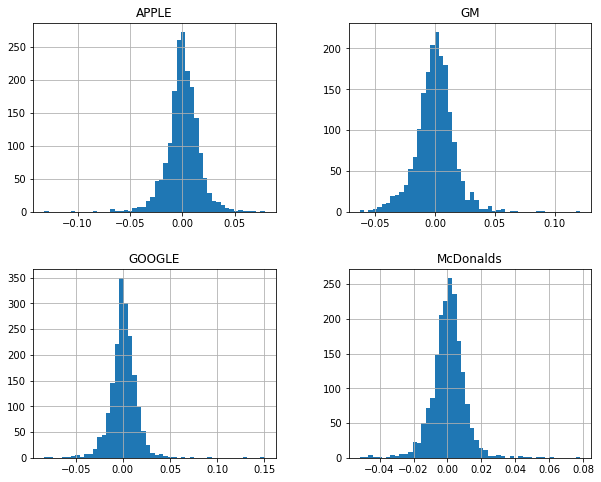

In [123]:
log_returns.hist(bins=50, figsize=(10, 8))

# １、平均分散モデル

In [124]:
noa = len(data.columns)

weights = np.random.random(noa)  
weights /= np.sum(weights)
weights.sum()

1.0

In [125]:
rets = np.log(data / data.shift(1))

In [126]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

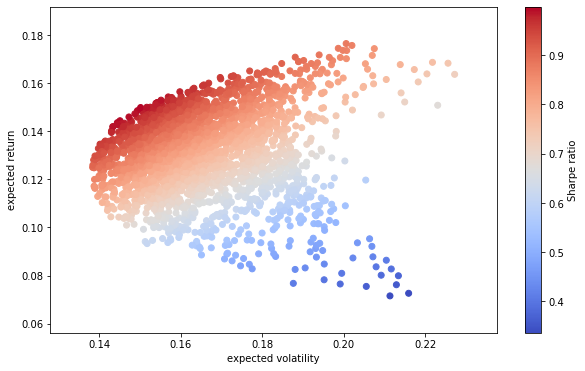

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [128]:
import scipy.optimize as sco
def min_func_sharpe(weights):  
    return -port_ret(weights) / port_vol(weights)
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])  
eweights

array([0.25, 0.25, 0.25, 0.25])

In [129]:
min_func_sharpe(eweights)

-0.8254523019446588

In [130]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

CPU times: user 97 ms, sys: 1.61 ms, total: 98.6 ms
Wall time: 97.6 ms


In [131]:
opts

     fun: -1.000780002300376
     jac: array([-2.00450420e-04, -1.72927976e-04,  1.91092491e-04,  3.19166467e-01])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.18336781, 0.32770738, 0.48892481, 0.        ])

In [132]:
optv = sco.minimize(port_vol, eweights,
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [133]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)


trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)  
    tvols.append(res['fun'])
tvols = np.array(tvols)


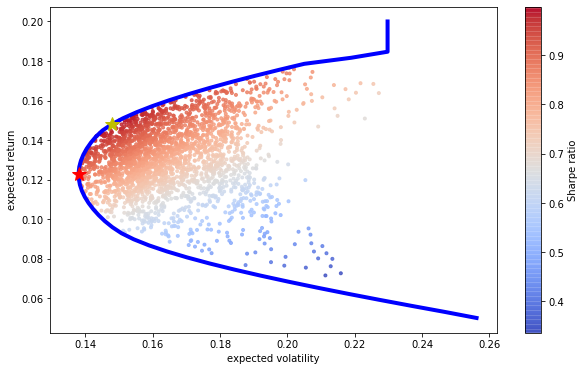

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [165]:
import scipy.interpolate as sci
ind = np.argmin(tvols)  
evols = tvols[ind:-6]  
erets = trets[ind:-6]

In [167]:
tck = sci.splrep(evols, erets)

In [168]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [169]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]  
    eq2 = rf + p[1] * p[2] - f(p[2])  
    eq3 = p[1] - df(p[2])  
    return eq1, eq2, eq3

In [170]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

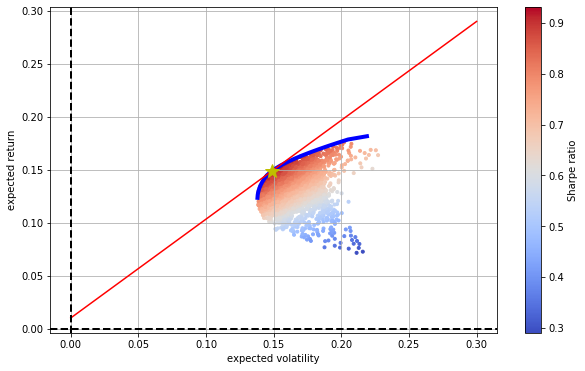

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols,
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [172]:
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x) - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})  
res = sco.minimize(port_vol, eweights, method='SLSQP',
                   bounds=bnds, constraints=cons)

In [173]:
res['x'].round(3)

array([0.187, 0.34 , 0.473, 0.   ])

In [174]:
port_ret(res['x'])

0.14905941187607646

In [175]:
port_vol(res['x'])

0.14897840649820793

In [176]:
port_ret(res['x']) / port_vol(res['x'])

1.0005437390543543

In [177]:
res

     fun: 0.14897840649820793
     jac: array([0.17018049, 0.18538236, 0.11446072, 0.09777788])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.18720681, 0.33962226, 0.47317093, 0.        ])

# 結論：
## つまり、"APPLE"は0.18720681,"GOOGLE"は0.33962226,"McDonalds"は0.47317093,"GM"は買うべきではないということがわかりました。

# ２、ブラック–リッターマンモデル

In [179]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [181]:
data

,APPLE,GOOGLE,McDonalds,GM
Date,,,,
2012-10-01,94.198570,381.271271,91.989998,23.090000
2012-10-02,94.472855,378.873871,90.930000,23.680000
2012-10-03,95.921425,381.631622,90.349998,24.389999
2012-10-04,95.257141,384.409424,91.029999,24.650000
2012-10-05,93.227142,384.209198,91.000000,24.799999
...,...,...,...,...
2020-01-24,318.309998,1466.170044,211.240005,34.310001
2020-01-27,308.950012,1431.729980,209.339996,33.410000
2020-01-28,317.690002,1450.500000,210.389999,33.639999


In [269]:
from pypfopt.black_litterman import BlackLittermanModel
S = risk_models.sample_cov(data)
viewdict = {"APPLE": 0.03, "GOOGLE": -0.05, "McDonalds": 0.1, "GM": 0.3}
bl = BlackLittermanModel(S, absolute_views=viewdict)
rets = bl.bl_returns()

In [270]:
rets

APPLE        0.033212
GOOGLE       0.006495
McDonalds    0.054539
GM           0.147491
dtype: float64

# 結論：
## つまり、"APPLE"は0.087490のリターンが減少し,"GOOGLE"は0.114276のリターンが減少し,"McDonalds"は0.088828のリターンが増加し,"GM"は0.169511のリターンが増加するということがわかりました。

In [271]:
SP500 = pdr.get_data_yahoo('^GSPC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2020, 1, 30))

In [272]:
market_prices=SP500["Close"]

In [273]:
from pypfopt import black_litterman

delta = black_litterman.market_implied_risk_aversion(market_prices)

ef = EfficientFrontier(rets, S)

bl.bl_weights(delta)
weights = bl.clean_weights()

In [274]:
weights

{'APPLE': -0.01634, 'GOOGLE': -0.3463, 'McDonalds': 0.60478, 'GM': 0.75786}

In [275]:
(weights.get('APPLE')+weights.get('GOOGLE')+weights.get('McDonalds')+weights.get('GM'))

1.0

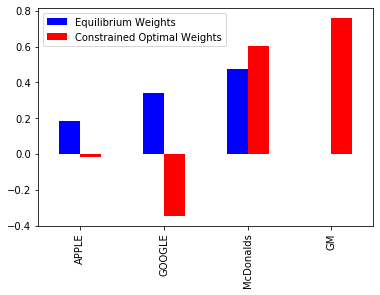

In [295]:
df = pd.DataFrame([res.x.reshape(4),np.array(list(weights.values())).reshape(4)],
                  columns=['APPLE','GOOGLE','McDonalds','GM'],
                  index=['Equilibrium Weights','Constrained Optimal Weights'])
df.T.plot(kind='bar', color='br')

# 結果はこのようになりました。青がもともとの時価総額ウェイト、赤が新しく計算された、投資家のビューを組み入れたポートフォリオウェイトを表しています。投資家の見通しに基づいてアップルとグーグルのウェイトが減少し、マクドナルドと、GMのウェイトが増加するという結果になりました。